In [1]:
# Must have pandas, pymongo, and yfinace installed on environment
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#API calls
#AstraZeneca
azn = yf.Ticker("AZN")
#Bristol Myers Squibb
bmy = yf.Ticker("BMY")
#Johnson & Johnson
jnj = yf.Ticker("JNJ")
#Merck
mrk = yf.Ticker("MRK")
#Pfizer
pfe = yf.Ticker("PFE")

In [3]:
#Extracting history data from stocks (parameters can change)
#Period parameters - 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
#Interval parameters - 1m, 2m, 5m, 15m, 30m, 1h, 1d, 5d, 1wk, 1mo, 3mo
azn_data = azn.history(interval="1d", period="10y")
bmy_data = bmy.history(interval="1d", period="10y")
jnj_data = jnj.history(interval="1d", period="10y")
mrk_data = mrk.history(interval="1d", period="10y")
pfe_data = pfe.history(interval="1d", period="10y")

In [4]:
#Converting to a DataFrame
azn_df = pd.DataFrame(azn_data)
bmy_df = pd.DataFrame(bmy_data)
jnj_df = pd.DataFrame(jnj_data)
mrk_df = pd.DataFrame(mrk_data)
pfe_df = pd.DataFrame(pfe_data)

In [5]:
#Inserting an identifier to know which stock the information came from
azn_df.insert(0, 'stock_name', 'AZN')
bmy_df.insert(0, 'stock_name', 'BMY')
jnj_df.insert(0, 'stock_name', 'JNJ')
mrk_df.insert(0, 'stock_name', 'MRK')
pfe_df.insert(0, 'stock_name', 'PFE')

In [6]:
#Add DataFrames to a list
dataframes = [azn_df, bmy_df, jnj_df, mrk_df, pfe_df]
#Concatinate this list into one DataFrame
stock_df = pd.concat(dataframes)

In [7]:
#Reset index
stock_df.reset_index(inplace=True)

In [8]:
#Remove unnecessary columns
stock_df.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)

In [9]:
stock_df.rename(columns={"Date":"date", 
                         "Open": "open", 
                         "High": "high",
                         "Low": "low",
                         "Close": "close", 
                         "Volume": "volume",}, inplace=True)

In [10]:
stock_df

,date,stock_name,open,high,low,close,volume
0,2011-03-04,AZN,15.860339,15.909001,15.707866,15.837630,1505400
1,2011-03-07,AZN,15.850608,15.853852,15.636498,15.665695,1762200
2,2011-03-08,AZN,15.548910,15.613792,15.500248,15.561887,1858800
3,2011-03-09,AZN,15.678674,15.698137,15.607303,15.652720,2595600
4,2011-03-10,AZN,15.552153,15.617035,15.506736,15.529445,2364200
...,...,...,...,...,...,...,...
12575,2021-02-25,PFE,33.820000,34.110001,33.540001,33.820000,37506100
12576,2021-02-26,PFE,33.840000,33.900002,33.360001,33.490002,41418100
12577,2021-03-01,PFE,33.590000,33.930000,33.509998,33.689999,30176500
12578,2021-03-02,PFE,33.680000,33.889999,33.500000,33.509998,27621600


In [50]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

,date,stock_name,open,high,low,close,volume
0,2011-03-04,AZN,15.860339,15.909001,15.707866,15.837630,1505400
1,2011-03-07,AZN,15.850608,15.853852,15.636498,15.665695,1762200
2,2011-03-08,AZN,15.548910,15.613792,15.500248,15.561887,1858800
3,2011-03-09,AZN,15.678674,15.698137,15.607303,15.652720,2595600
4,2011-03-10,AZN,15.552153,15.617035,15.506736,15.529445,2364200
...,...,...,...,...,...,...,...
12575,2021-02-25,PFE,33.820000,34.110001,33.540001,33.820000,37506100
12576,2021-02-26,PFE,33.840000,33.900002,33.360001,33.490002,41418100
12577,2021-03-01,PFE,33.590000,33.930000,33.509998,33.689999,30176500
12578,2021-03-02,PFE,33.680000,33.889999,33.500000,33.509998,27621600


In [51]:
from pandas.plotting import lag_plot
import numpy as np
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [69]:
azn_df = stock_df[stock_df['stock_name'] == 'AZN']
#azn_df = azn_df.set_index('date')
azn_df

,date,stock_name,open,high,low,close,volume
0,2011-03-04,AZN,15.860339,15.909001,15.707866,15.837630,1505400
1,2011-03-07,AZN,15.850608,15.853852,15.636498,15.665695,1762200
2,2011-03-08,AZN,15.548910,15.613792,15.500248,15.561887,1858800
3,2011-03-09,AZN,15.678674,15.698137,15.607303,15.652720,2595600
4,2011-03-10,AZN,15.552153,15.617035,15.506736,15.529445,2364200
...,...,...,...,...,...,...,...
2511,2021-02-25,AZN,49.849998,49.869999,48.750000,48.910000,12795900
2512,2021-02-26,AZN,48.849998,48.919998,47.980000,48.380001,8547800
2513,2021-03-01,AZN,48.459999,48.680000,48.080002,48.090000,11374500
2514,2021-03-02,AZN,48.400002,48.430000,47.669998,47.730000,14356500


In [70]:
azn_df.isnull().sum()

date          0
stock_name    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

In [71]:
azn_df.shape

(2516, 7)

In [72]:
azn_df.corr()

,open,high,low,close,volume
open,1.000000,0.999780,0.999736,0.999565,0.222858
high,0.999780,1.000000,0.999635,0.999772,0.227759
low,0.999736,0.999635,1.000000,0.999787,0.215332
close,0.999565,0.999772,0.999787,1.000000,0.220464
volume,0.222858,0.227759,0.215332,0.220464,1.000000


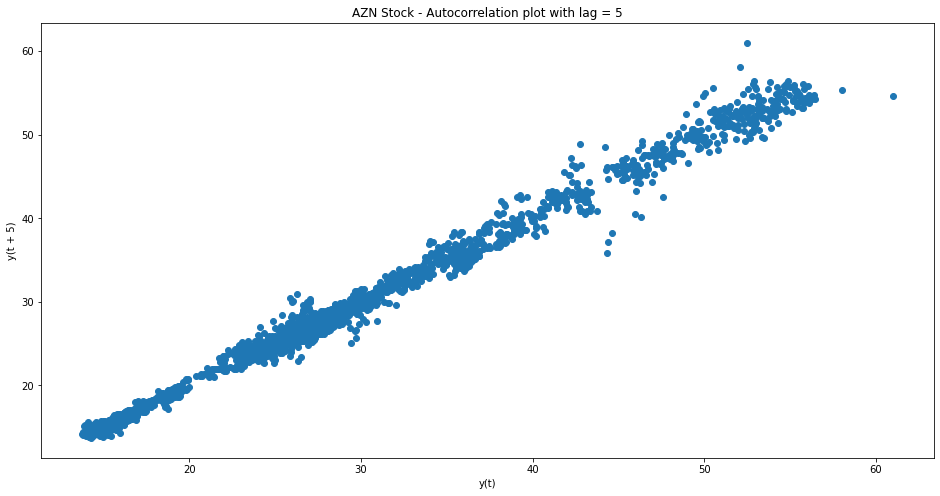

In [73]:
plt.figure(figsize=(16,8))
lag_plot(azn_df['open'], lag=5)
plt.title('AZN Stock - Autocorrelation plot with lag = 5')
plt.show()

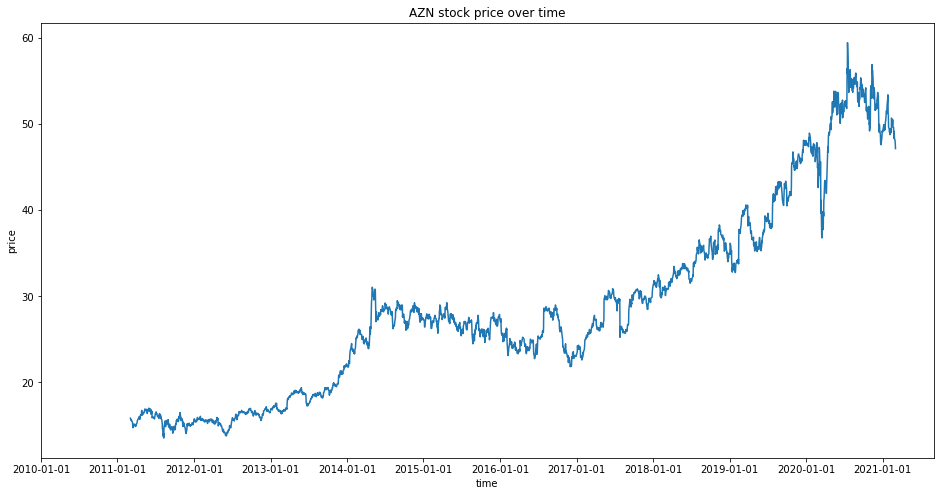

In [74]:
plt.figure(figsize=(16,8))
plt.plot(azn_df["date"], azn_df["close"])
xticks = pd.date_range(datetime.datetime(2010,1,1), datetime.datetime(2021,1,1), freq='YS')
xticks=xticks.to_pydatetime()
plt.xticks(xticks)
plt.title("AZN stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [116]:
X_train, X_test = azn_df[0:int(len(azn_df)*0.8)], azn_df[int(len(azn_df)*0.8):]
X_train = X_train.set_index('date')
X_test = X_test.set_index('date')
X_test

,stock_name,open,high,low,close,volume
date,,,,,,
2019-03-05,AZN,39.234637,40.225886,39.234637,39.942673,5668200
2019-03-06,AZN,39.989875,40.018195,39.583934,39.678337,2490000
2019-03-07,AZN,39.281839,39.432886,39.017507,39.329041,5283900
2019-03-08,AZN,39.130793,39.461208,39.026947,39.432888,4139200
2019-03-11,AZN,39.319604,39.961557,39.310162,39.829388,3501500
...,...,...,...,...,...,...
2021-02-25,AZN,49.849998,49.869999,48.750000,48.910000,12795900
2021-02-26,AZN,48.849998,48.919998,47.980000,48.380001,8547800
2021-03-01,AZN,48.459999,48.680000,48.080002,48.090000,11374500


<Figure size 864x576 with 0 Axes>

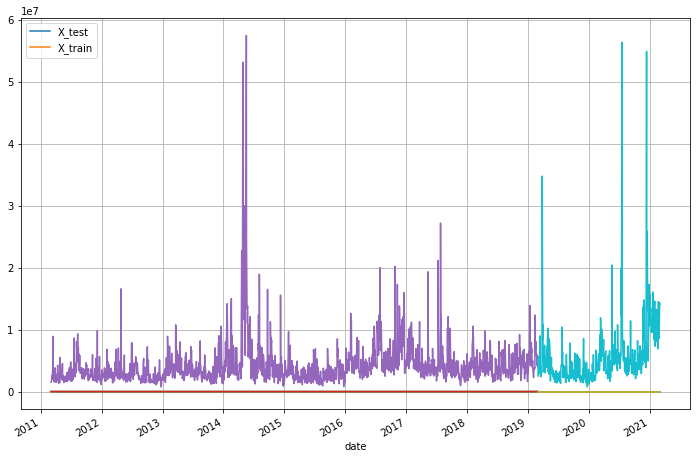

In [117]:
plt.figure(figsize=(12,8))
ax=X_train.plot(grid=True, figsize=(12,8))
X_test.plot(ax=ax,grid=True)
plt.legend(['X_test', 'X_train'])
plt.show()

In [118]:
#X_train, X_test = azn_df[0:int(len(azn_df)*0.8)], azn_df[int(len(azn_df)*0.8):]
training_data = X_train['close'].values
test_data = X_test['close'].values

In [119]:
import warnings
warnings.filterwarnings('ignore')
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.7392178978853275


In [121]:
X_test

,stock_name,open,high,low,close,volume
date,,,,,,
2019-03-05,AZN,39.234637,40.225886,39.234637,39.942673,5668200
2019-03-06,AZN,39.989875,40.018195,39.583934,39.678337,2490000
2019-03-07,AZN,39.281839,39.432886,39.017507,39.329041,5283900
2019-03-08,AZN,39.130793,39.461208,39.026947,39.432888,4139200
2019-03-11,AZN,39.319604,39.961557,39.310162,39.829388,3501500
...,...,...,...,...,...,...
2021-02-25,AZN,49.849998,49.869999,48.750000,48.910000,12795900
2021-02-26,AZN,48.849998,48.919998,47.980000,48.380001,8547800
2021-03-01,AZN,48.459999,48.680000,48.080002,48.090000,11374500


In [122]:
test_date_range = X_test.index #azn_df[int(len(azn_df)*0.8):].index
test_date_range

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03'],
              dtype='datetime64[ns]', name='date', length=504, freq=None)

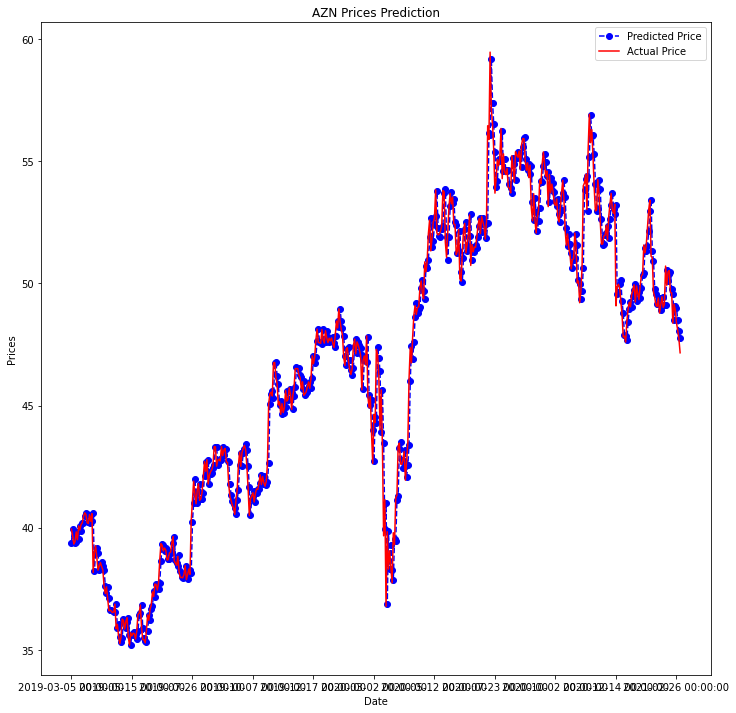

In [129]:
plt.figure(figsize=(12,12))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AZN Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(2012,2516,50), azn_df.date[2012:2516:50])
plt.legend()
plt.show()